# keras AutoEncoder

In [1]:
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
import matplotlib.pyplot as plt

Using TensorFlow backend.


## load data

In [2]:
(x_train, _), (x_test, y_test) = mnist.load_data()

# 使用min-max归一化，将0-1归一化到-0.5到0.5
x_train = x_train.astype('float32') / 255. - 0.5       # minmax_normalized
x_test = x_test.astype('float32') / 255. - 0.5         # minmax_normalized

# x_train = x_train.astype('float32') / 255.
# x_test = x_test.astype('float32') / 255.

print(x_train.shape)
print(x_test.shape)

x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))

print()
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)

(60000, 784)
(10000, 784)


## Plot in a 2D figure

In [3]:
encoding_dim = 2

# this is our input placeholder
input_img = Input(shape=(784,))

## encoder layers

In [4]:
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(10, activation='relu')(encoded)
encoder_output = Dense(encoding_dim)(encoded)

Instructions for updating:
Colocations handled automatically by placer.


## decoder layers

In [5]:
decoded = Dense(10, activation='relu')(encoder_output)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='tanh')(decoded)

## construct the autoencoder model

In [6]:
autoencoder = Model(input=input_img, output=decoded)

D:\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """Entry point for launching an IPython kernel.


## construct the encoder model for plotting

In [7]:
encoder = Model(input=input_img, output=encoder_output)

D:\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """Entry point for launching an IPython kernel.


## compile autoencoder

In [8]:
autoencoder.compile(optimizer='adam', loss='mse')

## training

In [10]:
autoencoder.fit(x_train, x_train,
                epochs=3,
                batch_size=256,
                shuffle=True)

Epoch 1/3
60000/60000 [==============================] - 13s 217us/step - loss: 0.0572
Epoch 2/3
60000/60000 [==============================] - 17s 280us/step - loss: 0.0521
Epoch 3/3
60000/60000 [==============================] - 21s 351us/step - loss: 0.0488


## plotting

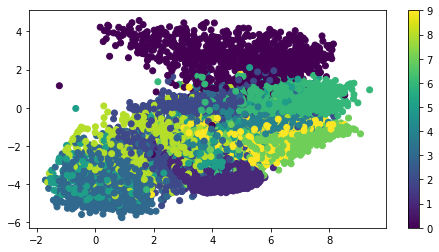

In [11]:
encoded_imgs = encoder.predict(x_test)

plt.figure(figsize=(8, 4))
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c=y_test)

plt.colorbar()
plt.show()